# By - Amandeep Singh Jagde

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [37]:
dataset=pd.read_csv("airline-passengers.csv")

In [38]:
#A.a.
dataset[['Month','Passangers']] = dataset['"Month","Passengers"'].str.split(",",expand=True)


In [39]:
dataset.head()

,"""Month"",""Passengers""",Month,Passangers
0,"""1949-01"",112","""1949-01""",112
1,"""1949-02"",118","""1949-02""",118
2,"""1949-03"",132","""1949-03""",132
3,"""1949-04"",129","""1949-04""",129
4,"""1949-05"",121","""1949-05""",121


In [40]:
dataset = dataset['Passangers']
dataset = np.array(dataset).reshape(-1,1)
dataset = dataset.astype(int)
dataset[:10]

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119]])

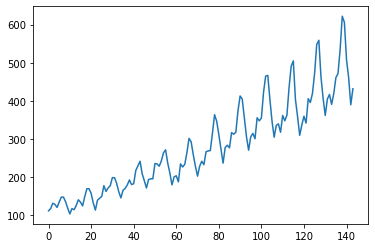

In [41]:
plt.plot(dataset)

In [42]:
#B
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
dataset.min(),dataset.max()

(0.0, 1.0)

In [44]:
dataset.shape

(144, 1)

In [45]:
#We are going to use the data of first 100 months as training data and the last 44 months as testing data.
train_size = 100
test_size = 44
train = dataset[0:train_size, :]
train.shape

(100, 1)

In [46]:
test = dataset[train_size:144, :]
test.shape

(44, 1)

In [47]:
def get_data(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [53]:
look_back = 1
X_train, y_train = get_data(train, look_back)
X_train.shape,y_train.shape

((98, 1), (98,))

In [54]:
X_test, y_test = get_data(test, look_back)

In [55]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [56]:
X_train.shape

(98, 1, 1)

In [60]:
#C Build the model LSTM
model = Sequential()
model.add(LSTM(5, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [63]:
#D
model.fit(X_train, y_train, epochs=100, batch_size=1)

Epoch 1/100
98/98 [==============================] - 1s 1ms/step - loss: 0.0303 - accuracy: 3.1028e-04
Epoch 2/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0111 - accuracy: 5.2182e-04
Epoch 3/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0096 - accuracy: 0.0237
Epoch 4/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0082 - accuracy: 0.0033
Epoch 5/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0064 - accuracy: 0.0116
Epoch 6/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 0.0065
Epoch 7/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0062 - accuracy: 0.0024
Epoch 8/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 0.0176
Epoch 9/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 0.0107
Epoch 10/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 0.0021
E

Epoch 82/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.0027
Epoch 83/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 0.0013
Epoch 84/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 0.0038
Epoch 85/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 4.1550e-04
Epoch 86/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 0.0313
Epoch 87/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.0371
Epoch 88/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0086
Epoch 89/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0150
Epoch 90/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.0086
Epoch 91/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 0.0

In [64]:
y_pred = model.predict(X_test)

In [65]:
scaler.scale_

array([0.0019305])

In [66]:
y_pred = scaler.inverse_transform(y_pred)
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

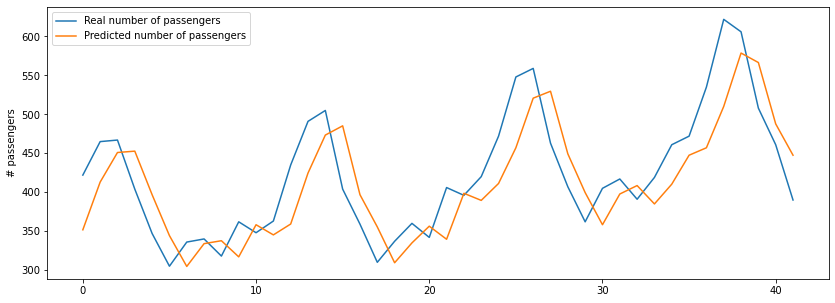

In [67]:
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'Real number of passengers')
plt.plot(y_pred, label = 'Predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()